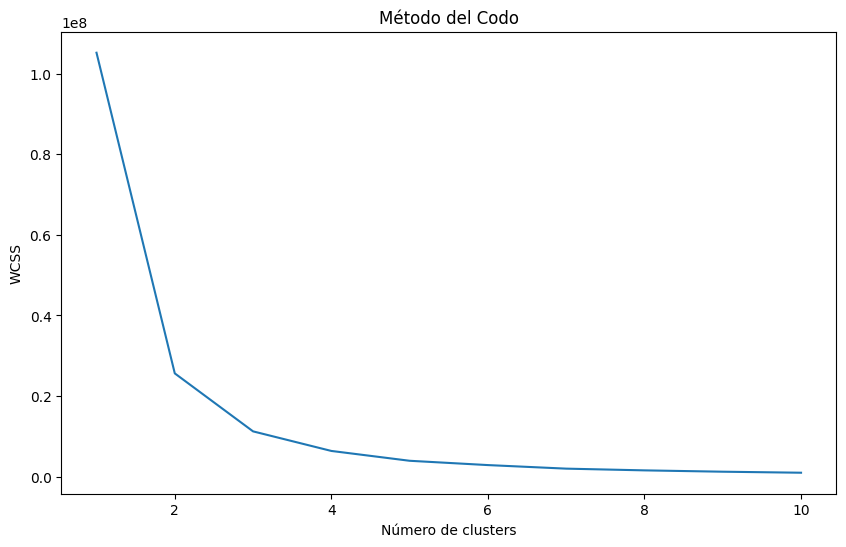

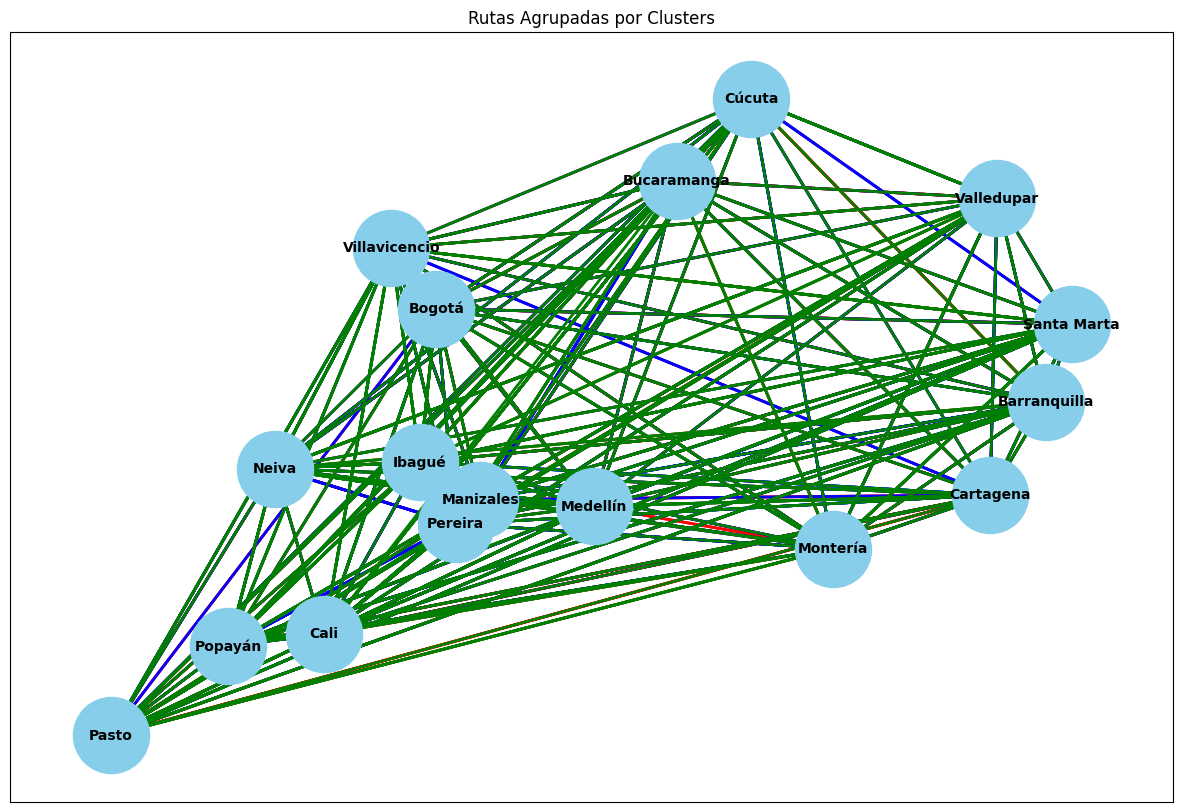

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt

# Simular datos históricos de tiempos de viaje entre ciudades
np.random.seed(42)
cities = ["Bogotá", "Medellín", "Cali", "Cartagena", "Bucaramanga", "Santa Marta", "Pereira", "Barranquilla", "Ibagué", "Villavicencio", "Manizales", "Neiva", "Pasto", "Cúcuta", "Popayán", "Montería", "Valledupar"]
num_samples = 1000

data = []
for _ in range(num_samples):
    city1, city2 = np.random.choice(cities, 2, replace=False)
    distance = np.random.uniform(100, 1200)  # Distancia en km
    traffic = np.random.uniform(0, 1)  # Índice de tráfico
    weather = np.random.uniform(0, 1)  # Índice de clima
    time = distance / (80 + traffic * 20 - weather * 10)  # Tiempo estimado en horas
    data.append([city1, city2, distance, traffic, weather, time])

df = pd.DataFrame(data, columns=["City1", "City2", "Distance", "Traffic", "Weather", "Time"])

# Aplicar el algoritmo de clustering K-means
X = df[["Distance", "Traffic", "Weather"]]

# Determinar el número óptimo de clusters usando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

# Elegir 3 clusters basados en el gráfico del codo
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Crear el grafo con clusters
G = nx.Graph()
for index, row in df.iterrows():
    G.add_edge(row['City1'], row['City2'], weight=row['Cluster'])

# Coordenadas aproximadas de las ciudades para la visualización
positions = {
    "Bogotá": (4.60971, -74.08175),
    "Medellín": (6.25184, -75.56359),
    "Cali": (3.43722, -76.5225),
    "Cartagena": (10.39105, -75.47943),
    "Bucaramanga": (7.11935, -73.12274),
    "Santa Marta": (11.24079, -74.19904),
    "Pereira": (4.81333, -75.69611),
    "Barranquilla": (10.96854, -74.78132),
    "Ibagué": (4.43889, -75.23222),
    "Villavicencio": (4.142, -73.62664),
    "Manizales": (5.07028, -75.51389),
    "Neiva": (2.9273, -75.28189),
    "Pasto": (1.21361, -77.28111),
    "Cúcuta": (7.89391, -72.50782),
    "Popayán": (2.43823, -76.61316),
    "Montería": (8.74798, -75.88143),
    "Valledupar": (10.46314, -73.25322)
}

# Verificar que todas las ciudades tengan posiciones definidas
for city in cities:
    if city not in positions:
        raise KeyError(f"Falta la posición de la ciudad: {city}")

# Visualizar el grafo con los clusters
fig, ax = plt.subplots(figsize=(15, 10))
colors = ['red', 'blue', 'green']
for cluster in range(3):
    edges = [(row['City1'], row['City2']) for index, row in df[df['Cluster'] == cluster].iterrows()]
    nx.draw_networkx_edges(G, positions, edgelist=edges, edge_color=colors[cluster], width=2, ax=ax)

nx.draw_networkx_nodes(G, positions, node_color="skyblue", node_size=3000, ax=ax)
nx.draw_networkx_labels(G, positions, font_size=10, font_weight="bold", ax=ax)
plt.title('Rutas Agrupadas por Clusters')
plt.show()


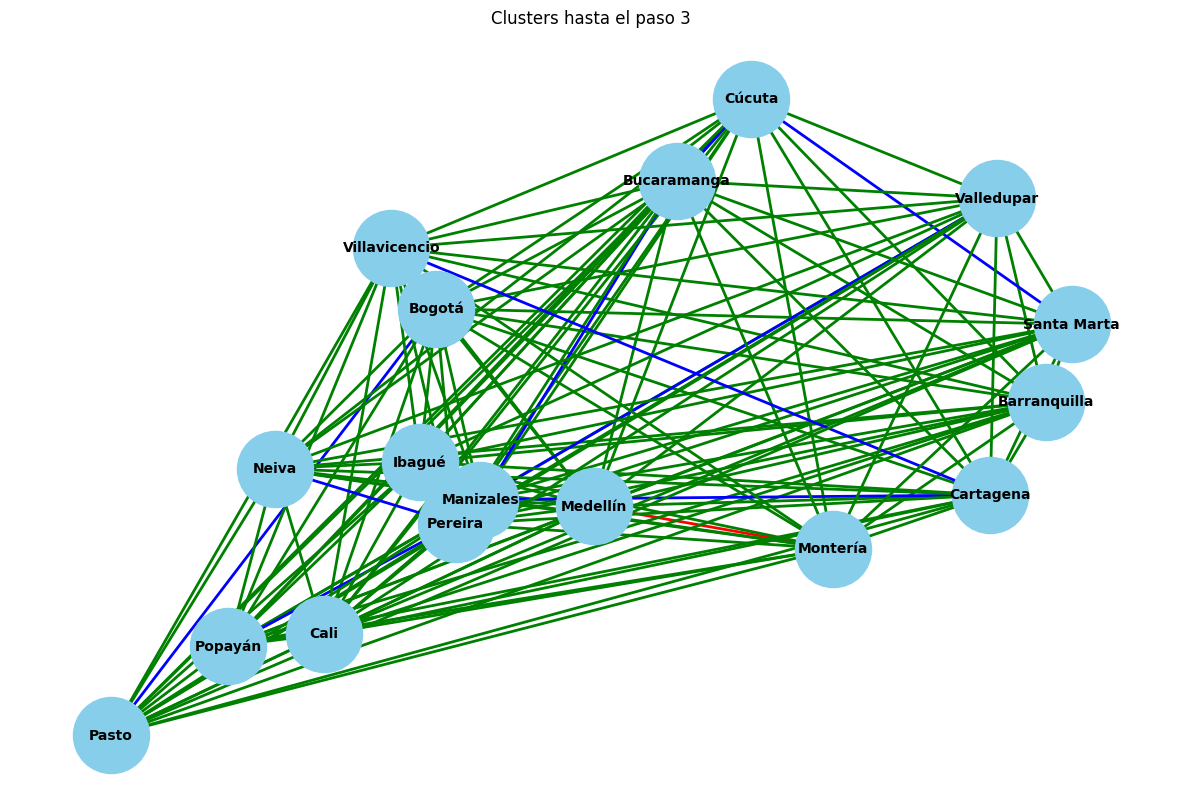

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Simular datos históricos de tiempos de viaje entre ciudades
np.random.seed(42)
cities = ["Bogotá", "Medellín", "Cali", "Cartagena", "Bucaramanga", "Santa Marta", "Pereira", "Barranquilla", "Ibagué", "Villavicencio", "Manizales", "Neiva", "Pasto", "Cúcuta", "Popayán", "Montería", "Valledupar"]
num_samples = 1000

data = []
for _ in range(num_samples):
    city1, city2 = np.random.choice(cities, 2, replace=False)
    distance = np.random.uniform(100, 1200)  # Distancia en km
    traffic = np.random.uniform(0, 1)  # Índice de tráfico
    weather = np.random.uniform(0, 1)  # Índice de clima
    time = distance / (80 + traffic * 20 - weather * 10)  # Tiempo estimado en horas
    data.append([city1, city2, distance, traffic, weather, time])

df = pd.DataFrame(data, columns=["City1", "City2", "Distance", "Traffic", "Weather", "Time"])

# Aplicar el algoritmo de clustering K-means
X = df[["Distance", "Traffic", "Weather"]]

# Elegir 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Crear el grafo con clusters
G = nx.Graph()

# Coordenadas aproximadas de las ciudades para la visualización
positions = {
    "Bogotá": (4.60971, -74.08175),
    "Medellín": (6.25184, -75.56359),
    "Cali": (3.43722, -76.5225),
    "Cartagena": (10.39105, -75.47943),
    "Bucaramanga": (7.11935, -73.12274),
    "Santa Marta": (11.24079, -74.19904),
    "Pereira": (4.81333, -75.69611),
    "Barranquilla": (10.96854, -74.78132),
    "Ibagué": (4.43889, -75.23222),
    "Villavicencio": (4.142, -73.62664),
    "Manizales": (5.07028, -75.51389),
    "Neiva": (2.9273, -75.28189),
    "Pasto": (1.21361, -77.28111),
    "Cúcuta": (7.89391, -72.50782),
    "Popayán": (2.43823, -76.61316),
    "Montería": (8.74798, -75.88143),
    "Valledupar": (10.46314, -73.25322)
}

# Definir colores para los clusters
colors = ['red', 'blue', 'green']

# Función para agregar las aristas del cluster actual al grafo
def add_edges_to_graph(cluster):
    edges = [(row['City1'], row['City2']) for index, row in df[df['Cluster'] == cluster].iterrows()]
    for edge in edges:
        G.add_edge(edge[0], edge[1], color=colors[cluster])

# Función de actualización para la animación
def update(num, clusters):
    ax.clear()
    for cluster in range(num + 1):
        add_edges_to_graph(cluster)
    edges = G.edges(data=True)
    edge_colors = [edge[2]['color'] for edge in edges]
    nx.draw(G, positions, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color=edge_colors, width=2, ax=ax)
    plt.title(f'Clusters hasta el paso {num+1}')

# Inicializar la figura
fig, ax = plt.subplots(figsize=(15, 10))

# Obtener la secuencia de clusters
clusters_sequence = df['Cluster'].unique()

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(clusters_sequence), fargs=[clusters_sequence], interval=1000, repeat=False)

# Guardar la animación como un archivo GIF
ani.save('clusters_animation.gif', writer='pillow')

# Mostrar la animación
plt.show()
